In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
data = pd.read_csv('aug_train.csv')
test = pd.read_csv('aug_test.csv')

In [ ]:
data.head(5)
# target = 0 means those employees are not looking for a job change.
# target = 1 means those employees are looking for a job change.

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
data.dtypes

,0
enrollee_id,int64
city,object
city_development_index,float64
gender,object
relevent_experience,object
enrolled_university,object
education_level,object
major_discipline,object
experience,object
company_size,object


In [ ]:
data.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


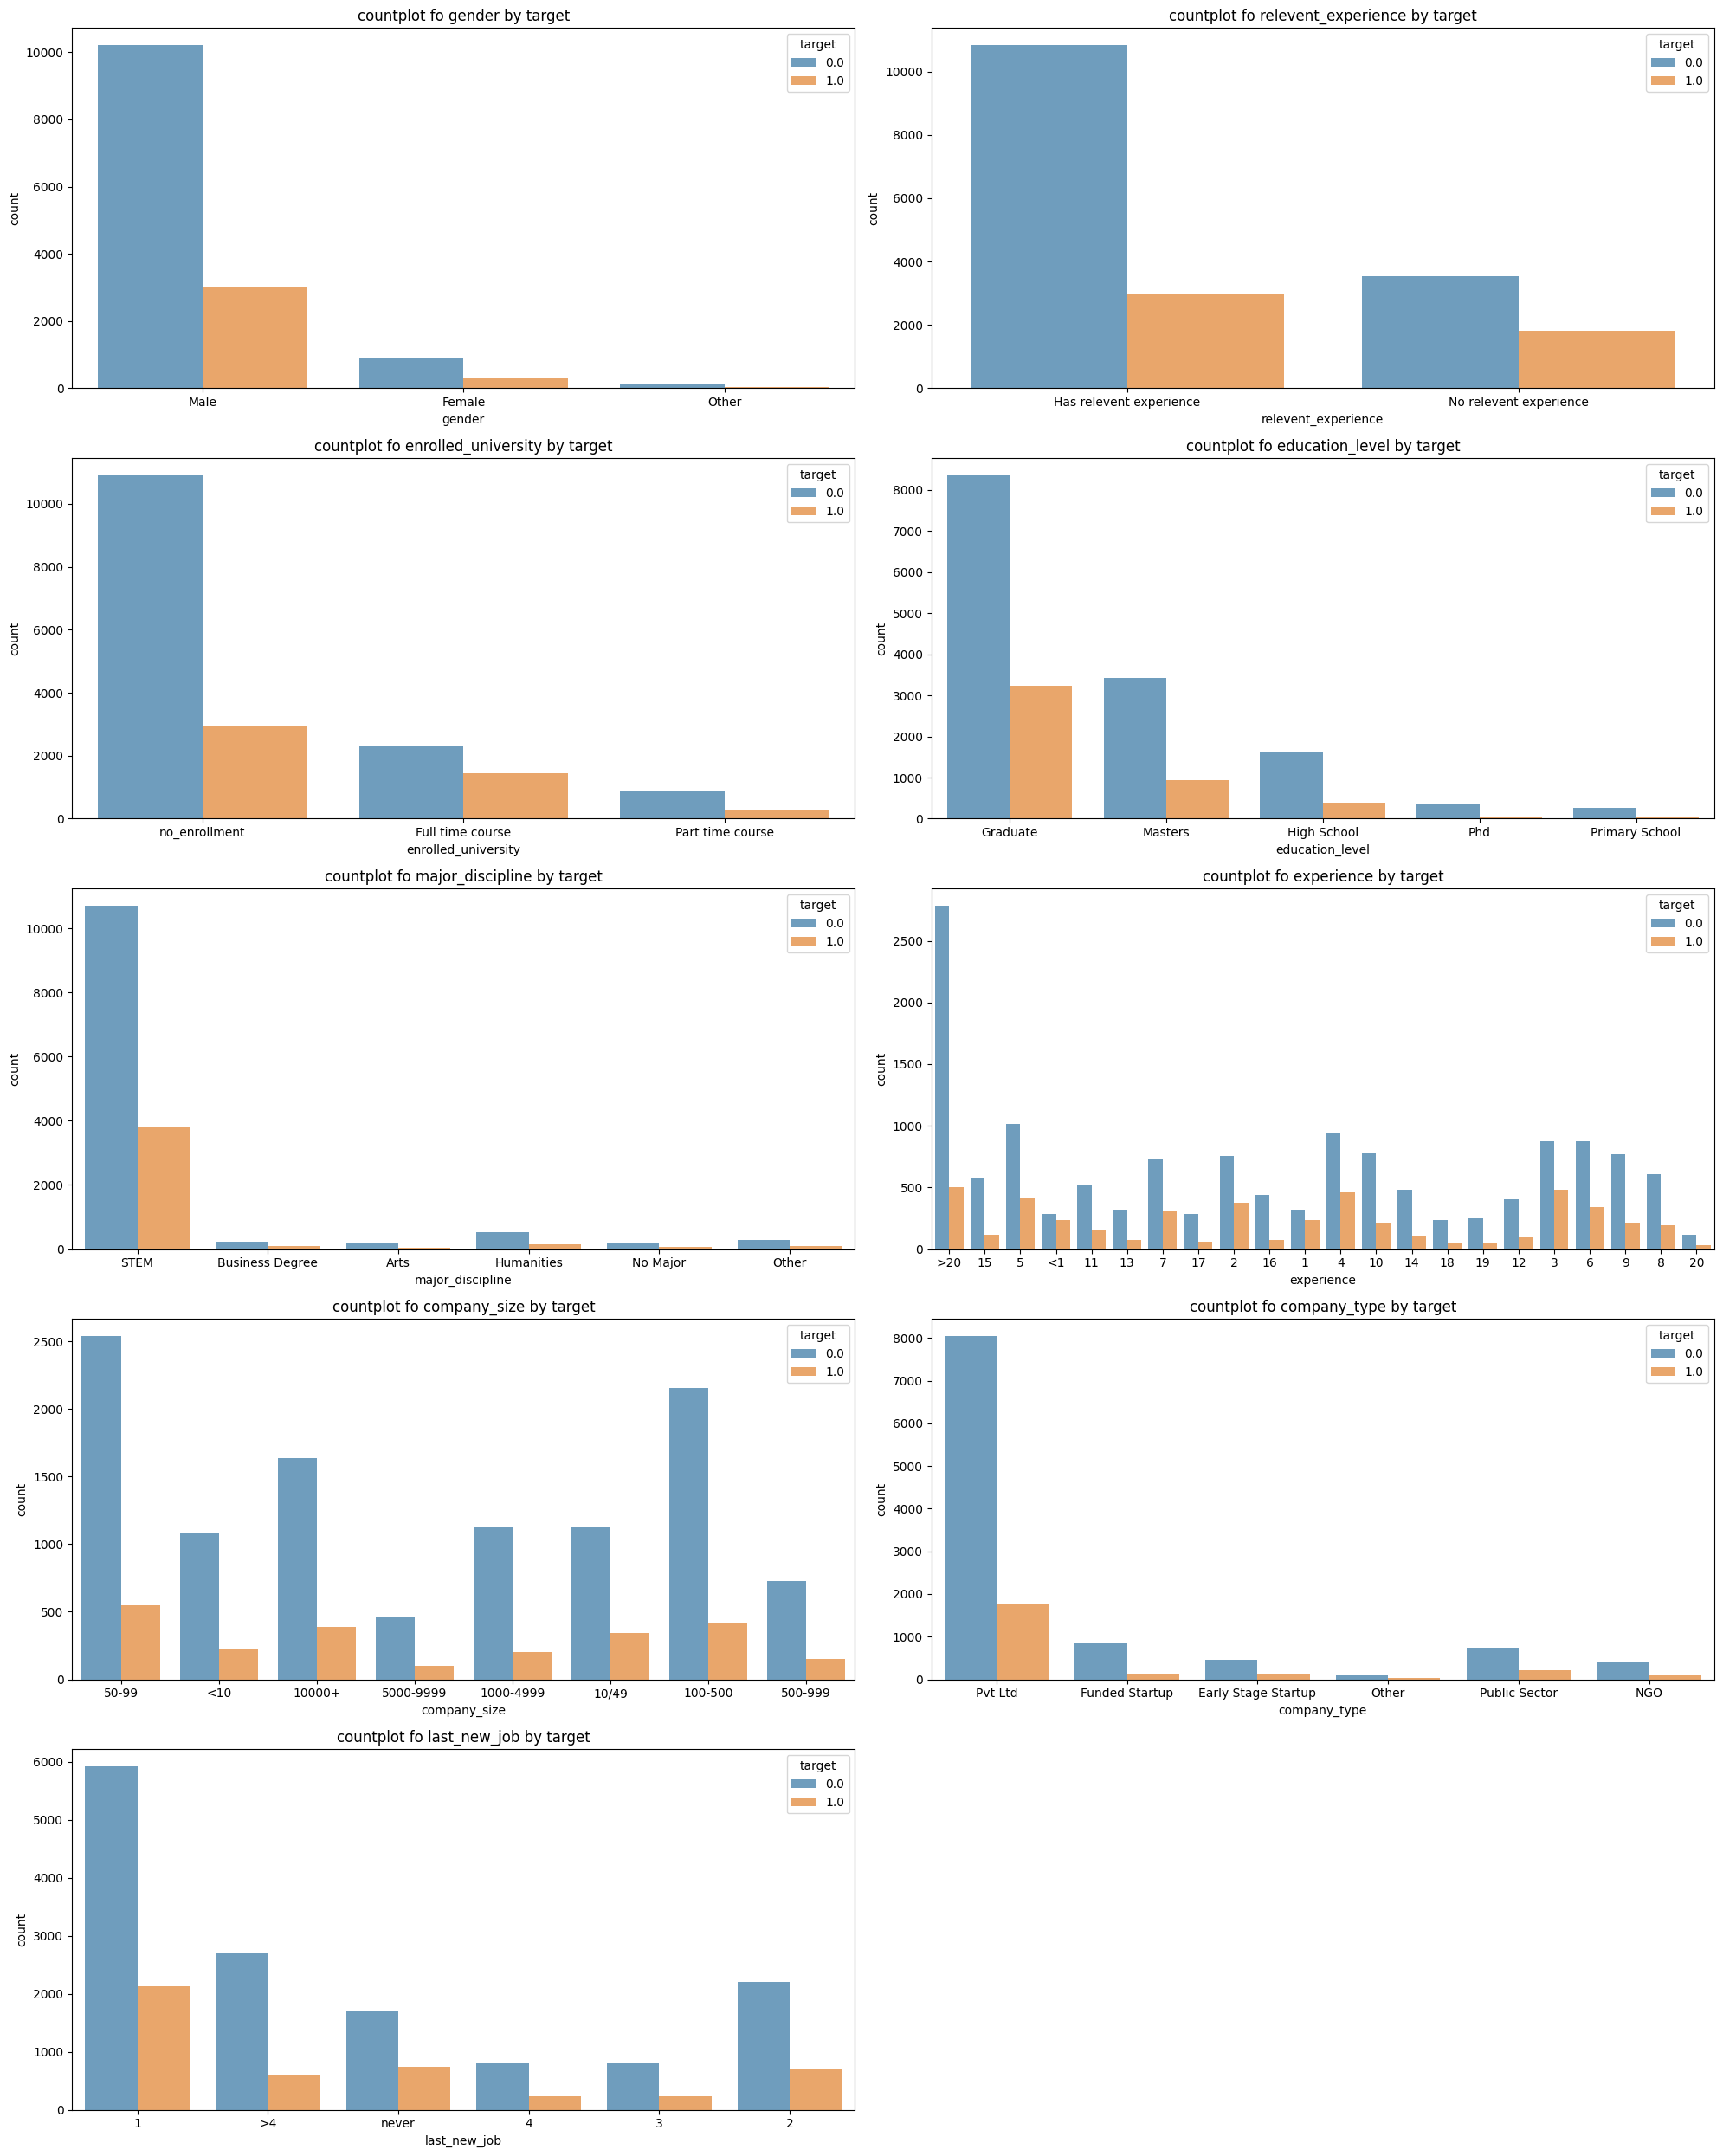

In [ ]:
# Frequency of each category separeted by label.
plt.figure(figsize=[20,25])
features = ['gender', 'relevent_experience', 'enrolled_university',
            'education_level', 'major_discipline', 'experience',
            'company_size', 'company_type', 'last_new_job']

n = 1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', alpha = 0.7, data=data)
    plt.title('countplot fo {} by target'.format(f))
    n = n+1
plt.tight_layout()
plt.show()

In [ ]:
# 1. Data Treatment

In [ ]:
# Churn vs Normal
counts = data.target.value_counts()
not_change = counts[0]
change = counts[1]
prec_not_change = (not_change / (not_change + change)) * 100
prec_change = (change / (not_change + change)) * 100
print("Not looking for a job change: {} ({:.2f}%).".format(not_change, prec_not_change))
print("Looking for a job change: {} ({:.2f}%).".format(change, prec_change))

Not looking for a job change: 14381 (75.07%).
Looking for a job change: 4777 (24.93%).


In [ ]:
# If we want to select the the numerical columns only or categorical columns only from the larger dataset,
# We can use the following code:
np.array(data.columns[data.dtypes != 'object'])

array(['enrollee_id', 'city_development_index', 'training_hours',
       'target'], dtype=object)

In [ ]:
import copy

In [ ]:
df_train = copy.deepcopy(data)
df_test = copy.deepcopy(test)

cols = np.array(data.columns[data.dtypes != 'object'])
for i in df_train.columns:
    if i not in cols:
        df_train[i] = df_train[i].map(str)
        df_test[i] = df_test[i].map(str)
df_train.drop(columns = cols, inplace=True)
df_test.drop(columns = np.delete(cols, len(cols)-1), inplace=True)

In [ ]:
df_train.dtypes

,0
city,object
gender,object
relevent_experience,object
enrolled_university,object
education_level,object
major_discipline,object
experience,object
company_size,object
company_type,object
last_new_job,object


In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

In [ ]:
# Building the dict funtion
cols = np.array(data.columns[data.dtypes != 'object'])
d = defaultdict(LabelEncoder)

# Only for categorical columns apply dict by calling the fit_transform function.
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test = df_test.apply(lambda x: d[x.name].fit_transform(x))
df_train[cols] = data[cols]
df_test[np.delete(cols, len(cols)-1)] = test[np.delete(cols, len(cols)-1)]

In [ ]:
df_train.dtypes

,0
city,int64
gender,int64
relevent_experience,int64
enrolled_university,int64
education_level,int64
major_discipline,int64
experience,int64
company_size,int64
company_type,int64
last_new_job,int64


Text(0.5, 1.0, 'Heat map of all the features of train dataset')

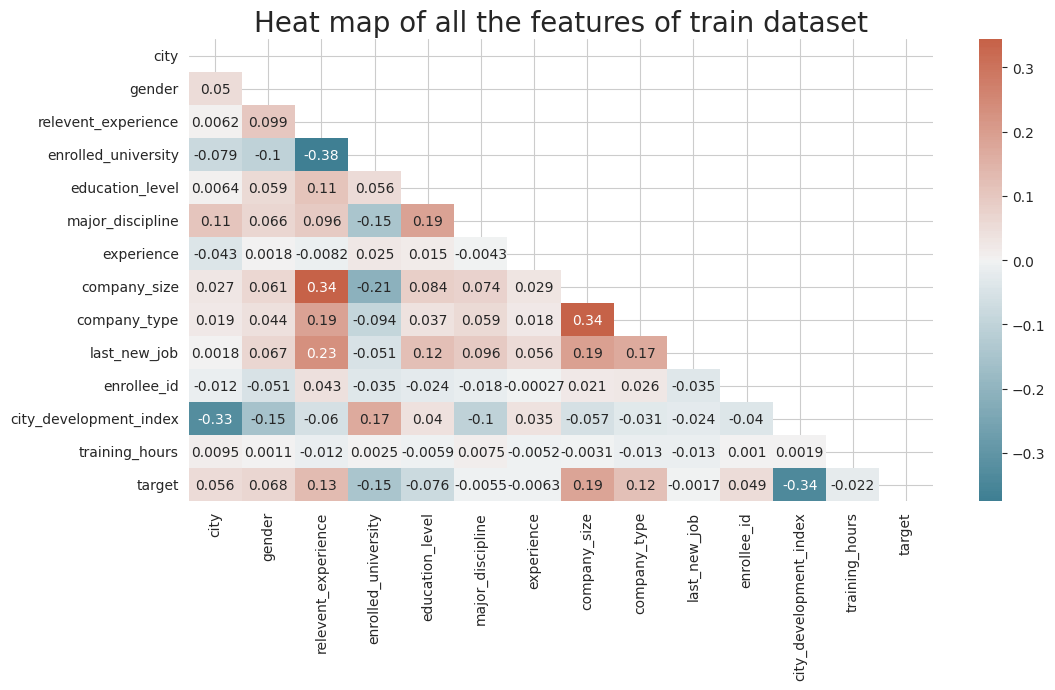

In [ ]:
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize=(12,6))

# Generate the upper mask triangle
mask = np.zeros_like(df_train.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap = sns.diverging_palette(220, 20, n=200), annot=True,
                                                          mask = mask, center=0)
plt.title('Heat map of all the features of train dataset', fontsize=20)

<Axes: xlabel='target', ylabel='experience'>

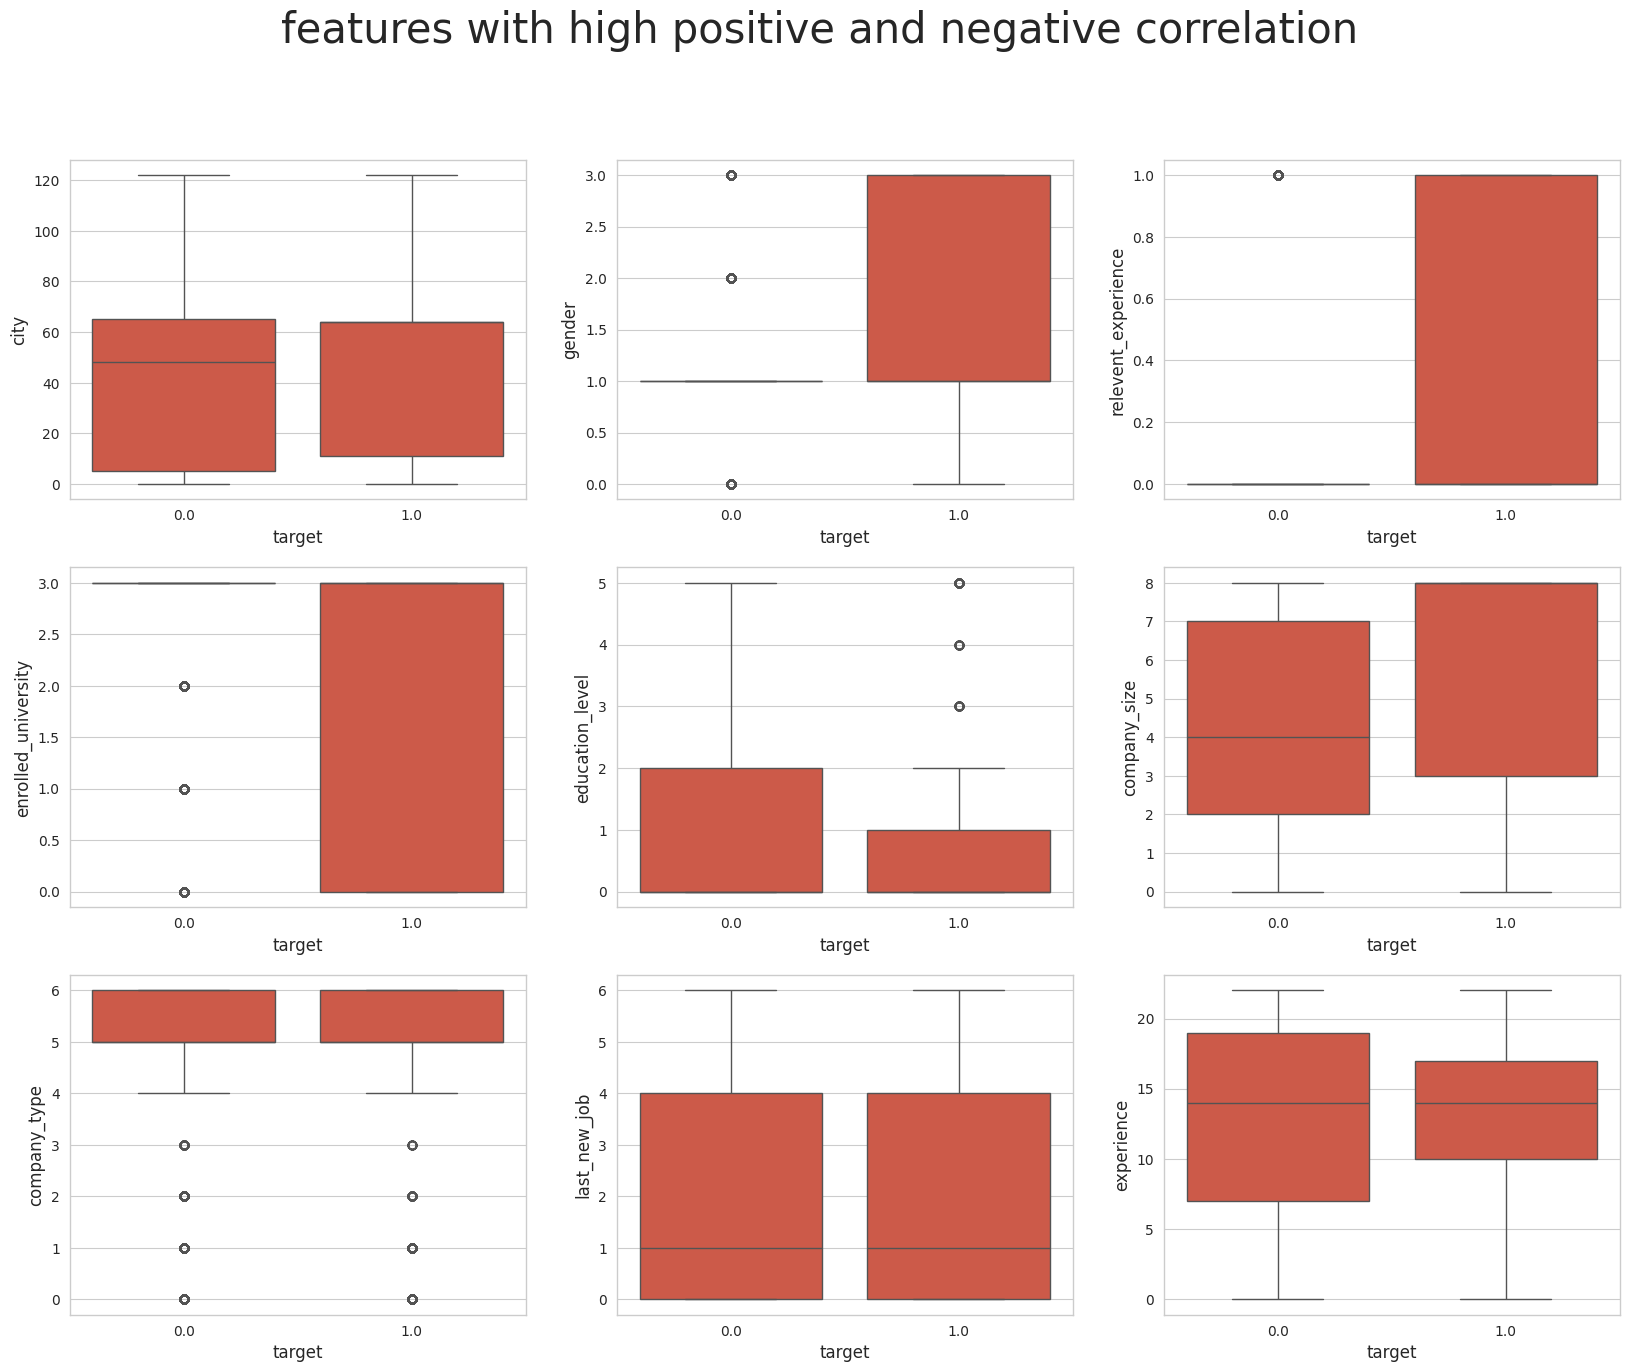

In [ ]:
# Visualization of the features which has positive and negative correlation.
# FOr that we will use box plot.

f, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,15))

f.suptitle('features with high positive and negative correlation', size=30)
sns.boxplot(x='target', y='city', data = df_train, ax= axes[0,0])
sns.boxplot(x='target', y='gender', data = df_train, ax= axes[0,1])
sns.boxplot(x='target', y='relevent_experience', data = df_train, ax= axes[0,2])
sns.boxplot(x='target', y='enrolled_university', data = df_train, ax= axes[1,0])
sns.boxplot(x='target', y='education_level', data = df_train, ax= axes[1,1])
sns.boxplot(x='target', y='company_size', data = df_train, ax= axes[1,2])
sns.boxplot(x='target', y='company_type', data = df_train, ax= axes[2,0])
sns.boxplot(x='target', y='last_new_job', data = df_train, ax= axes[2,1])
sns.boxplot(x='target', y='experience', data = df_train, ax= axes[2,2])



################# or using loop we can do it like this:- #################
# features = [
#     'city', 'gender', 'relevent_experience',
#     'enrolled_university', 'education_level', 'company_size',
#     'company_type', 'last_new_job', 'experience'
# ]

# # subplots creating
# f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
# f.suptitle('features with high positive and negative correlation', size=30)

# # Flatten axes for easy iteration
# axes = axes.flatten()

# for i, feature in enumerate(features):
#     sns.boxplot(x='target', y=feature, data=df_train, ax=axes[i])

# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


Text(0.5, 1.0, 'Heat map of all the features of test dataset')

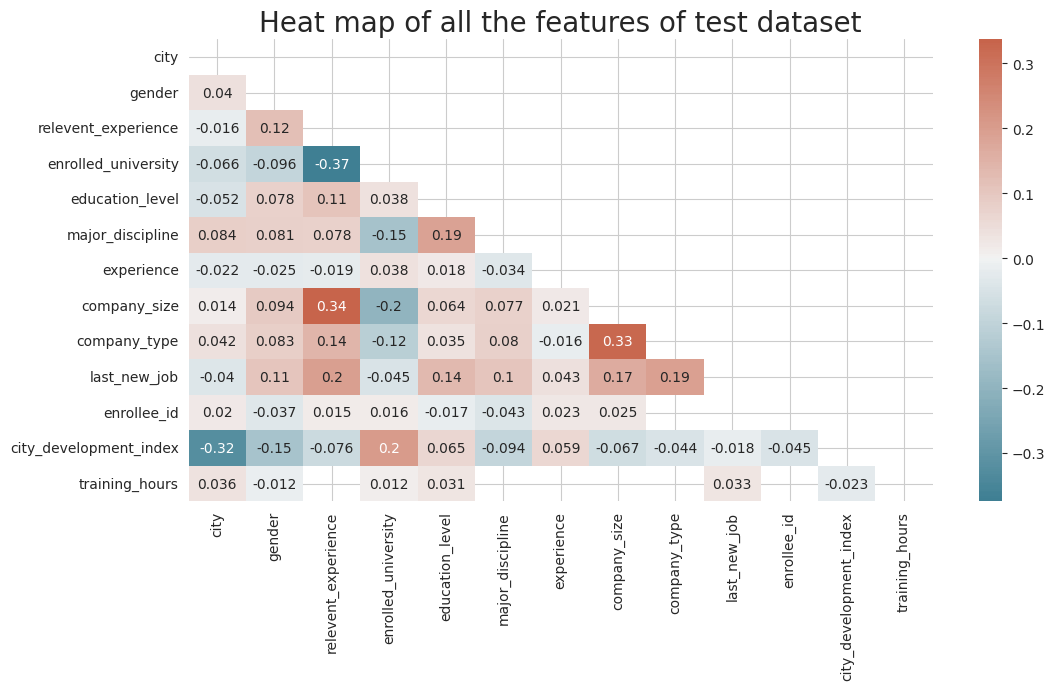

In [ ]:
# Doing the same things like creating the heat map again for the test datasets and all such processing.

import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize=(12,6))

# Generate the upper mask triangle
mask = np.zeros_like(df_test.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

corr = df_test.corr()
sns.heatmap(corr[(corr.abs() > 0.01)],
            cmap = sns.diverging_palette(220, 20, n=200),
            annot=True,
            mask = mask, center=0)
plt.title('Heat map of all the features of test dataset', fontsize=20)

In [ ]:
df_train['target'].value_counts()
# we can see that the dataset is imbalanced. Majority of the employees are not looking for a job change.
# So to overcome this, SMOTE(Synthetic Minority Over-sampling Technique) will be use.

,count
target,
0.0,14381
1.0,4777


In [ ]:
# 2. Dealing with imbalanced data using SMOTE technique.

In [ ]:
df_train.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'enrollee_id', 'city_development_index',
       'training_hours', 'target'],
      dtype='object')

In [ ]:
ftrain = ['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'company_size','company_type', 'city_development_index',
       'training_hours', 'target']

ftest = ['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'company_size','company_type', 'city_development_index',
       'training_hours']

def Definedata():
    # Defining the data as it is the imbalanced data.
    data2 = df_train[ftrain]
    x = data2.drop(columns = ['target']).values
    y = data2['target'].values
    return x,y

In [35]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
from numpy import where

def SMOTE_fun():
    # Borderline-SMOTE for imbalanced dataset.
    x,y = Definedata()

    # Summarize the class dist.
    counter = Counter(y)
    print(counter)

    # transform the data
    smt = SMOTE(random_state=42)
    x,y = smt.fit_resample(x,y)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

    # Summarize the new class distribution
    counter = Counter(y)
    print(counter)

    # SCatter plot of example by class labels.
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        plt.scatter(x[row_ix,0],x[row_ix,1], label = str(label))
    plt.legend()
    plt.show()
    return x_train, x_test, y_train, y_test

In [36]:
# MAchine learning modeling:-

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [46]:
def Models(model, x_train, x_test, y_train, y_test, title):
    model.fit(x_train, y_train)

    x, y = make_classification(n_samples=1000, n_features=9, n_informative=2,
                               n_redundant=0, n_clusters_per_class=1,
                               weights=[0.9], random_state=42)

    train_matrix = pd.crosstab(y_train, model.predict(x_train), rownames=['Actual'], colnames=['Predicted'])
    test_matrix = pd.crosstab(y_test, model.predict(x_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(x), rownames=['Actual'], colnames=['Predicted'])

    f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20,7))
    g1 = sns.heatmap(train_matrix, annot=True, fmt='d', cbar=False, annot_kws={"size": 20}, ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total career switch = {}'.format(y_train.sum()), fontsize=15)
    g1.set_xlabel('Accuracy = {:.2f}%'.format(accuracy_score(y_train, model.predict(x_train))), fontsize=15)

    g2 = sns.heatmap(test_matrix, annot=True, fmt='d', cbar=False, annot_kws={"size": 20}, ax=ax2)
    g2.set_ylabel('Total career switch = {}'.format(y_test.sum()), fontsize=15)
    g2.set_xlabel('Accuracy = {:.2f}%'.format(accuracy_score(y_test, model.predict(x_test))), fontsize=15)

    g3 = sns.heatmap(matrix, annot=True, fmt='d', cbar=False, annot_kws={"size": 20}, ax=ax3)
    g3.set_ylabel('Total career switch = {}'.format(y.sum()), fontsize=15)
    g3.set_xlabel('Accuracy = {:.2f}%'.format(accuracy_score(y, model.predict(x))), fontsize=15)

    plt.show()
    return y, model.predict(x)

In [47]:
def Featureimportance(model, x_train1, y_train1, df_test):
    model.fit(x_train1, y_train1)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': features, 'Importance': importances})
    imp['sum importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by='Importance')
    return imp

Counter({np.float64(0.0): 14381, np.float64(1.0): 4777})
Counter({np.float64(1.0): 14381, np.float64(0.0): 14381})


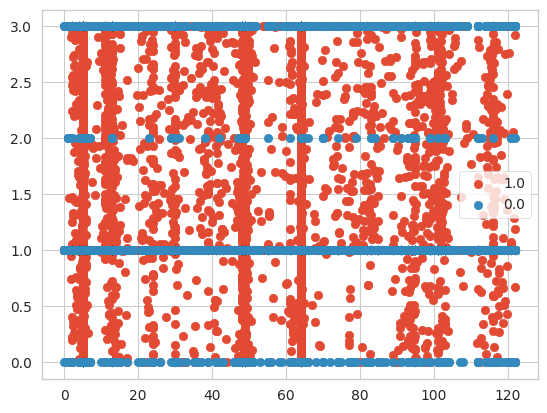

In [48]:
x_train1, x_test1, y_train1, y_test1 = SMOTE_fun()

In [52]:
# Building Logistic regression, KNN and Decision tree classifier.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


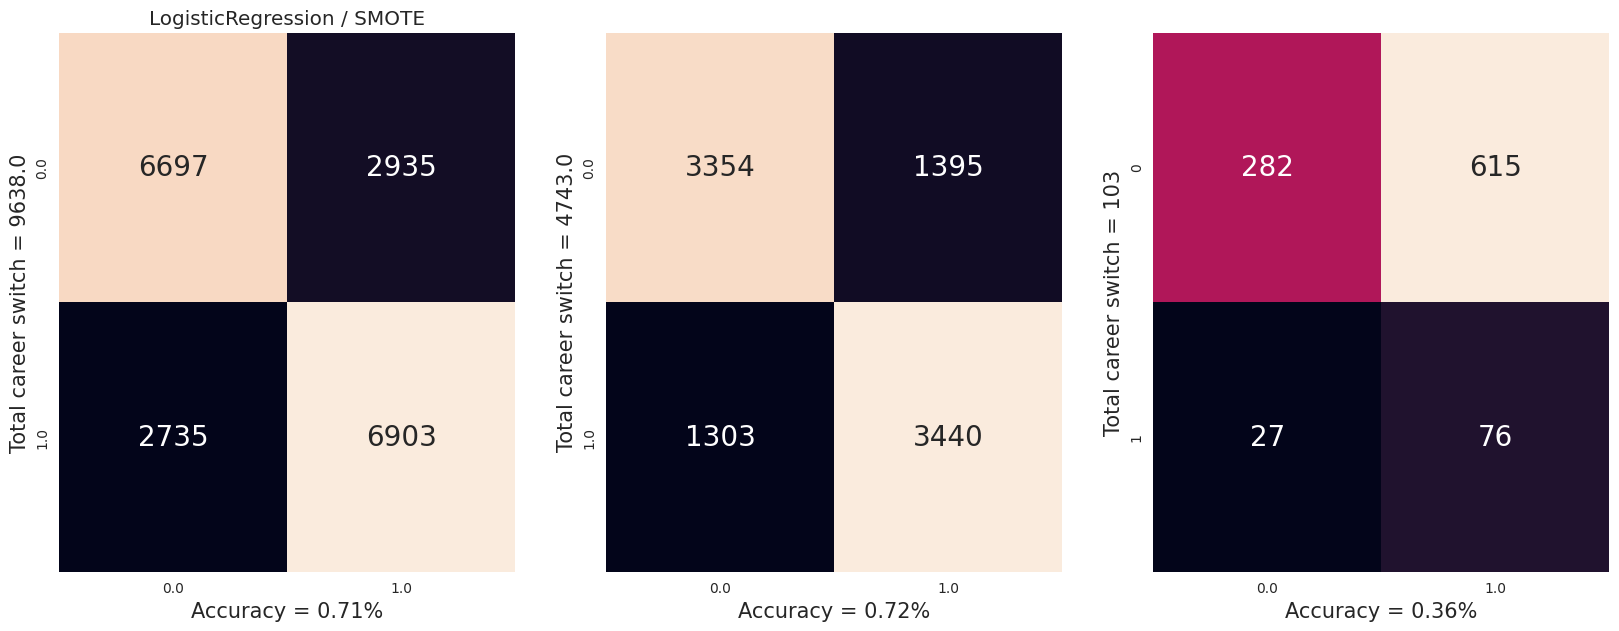

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [50]:
title = "LogisticRegression / SMOTE"
Models(LogisticRegression(), x_train1, x_test1, y_train1, y_test1, title)

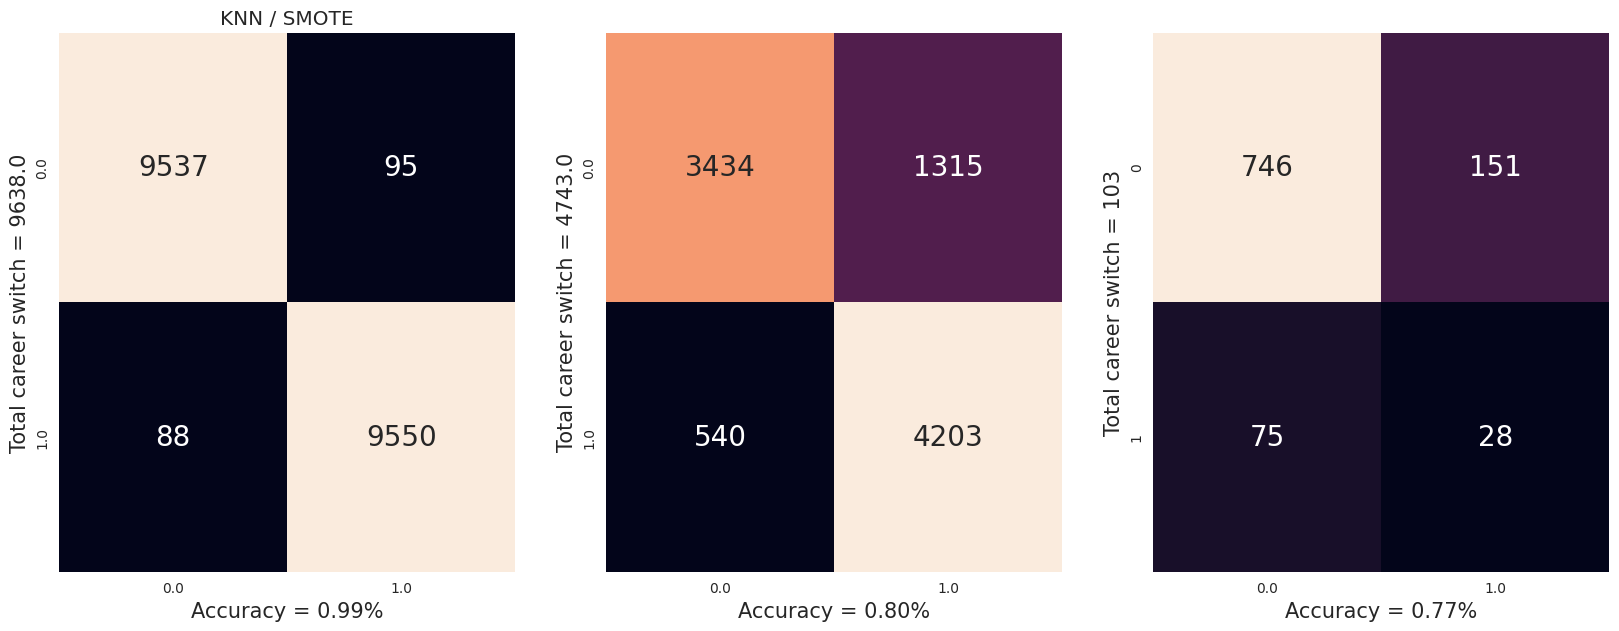

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [51]:
title = "KNN / SMOTE"
Models(KNeighborsClassifier(n_neighbors=1), x_train1, x_test1, y_train1, y_test1, title)

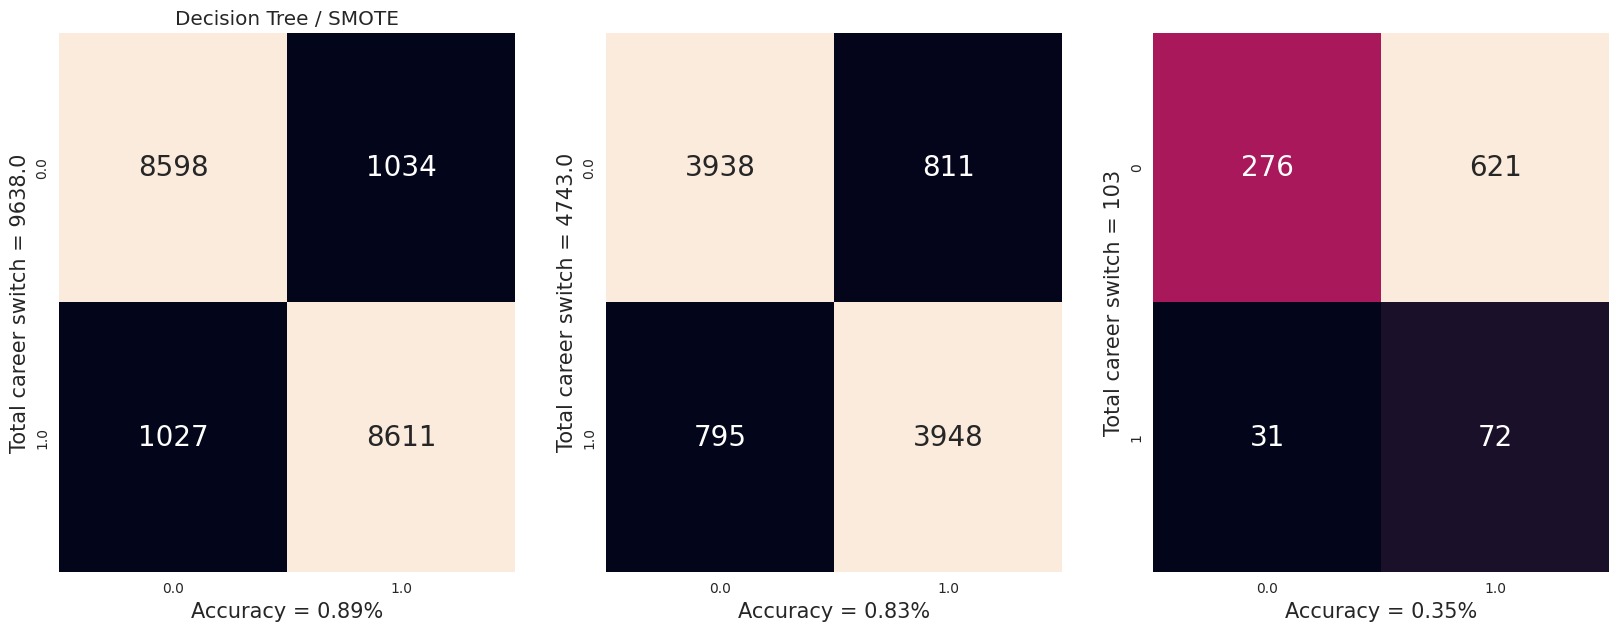

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [53]:
title = "Decision Tree / SMOTE"
Models(DecisionTreeClassifier(max_depth=14), x_train1, x_test1, y_train1, y_test1, title)

In [57]:
Featureimportance(DecisionTreeClassifier(max_depth=14), x_train1, y_train1, df_test)

,Features,Importance,sum importance
3,enrolled_university,0.023465,0.212104
1,gender,0.043069,0.094491
0,city,0.051422,0.051422
5,major_discipline,0.062472,0.394549
2,relevent_experience,0.094148,0.188639
8,company_type,0.096195,1.000000
4,education_level,0.119973,0.332077
7,company_size,0.251735,0.903805
6,experience,0.257521,0.652070
